In [228]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler

In [230]:
employee = pd.read_csv("C:\\Users\\naasa\\OneDrive\\Desktop\\Entri\\machine learning\\Machine learning Task\\Employee.csv")
employee

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [231]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [232]:
#list unique values and their lengths 
for column in employee.columns:
    
    unique_value =  employee[column].unique()
    print(f"----\nColoumn name: {column},\nunique value: {unique_value},\nlength = {len(unique_value)}")
    

----
Coloumn name: Company,
unique value: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'],
length = 7
----
Coloumn name: Age,
unique value: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.],
length = 30
----
Coloumn name: Salary,
unique value: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.],
length = 41
----
Coloumn name: Place,
unique value: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'],
length = 12
----
Coloumn name: Country,
unique value: ['India'],
length = 1
----
Coloumn name: Gender,
unique value: [0 1],
length = 2


In [233]:
#Perform statistical analysis
employee.describe(include ="all")

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [234]:
employee = employee.rename(columns = {'Place':'City'})
employee

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [235]:
#Find the missing values
employee.isnull().sum()

Company     8
Age        18
Salary     24
City       14
Country     0
Gender      0
dtype: int64

In [236]:
employee["Salary"].fillna(employee["Salary"].mean(), inplace = True)
employee["Age"].fillna(employee["Age"].mean(), inplace = True)
employee

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [237]:
employee.drop_duplicates(inplace=True)
employee

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [238]:
#Finding Outliers
from scipy.stats import zscore
z_score = zscore(employee["Salary"])
outlier = (z_score>3)|(z_score<-3)
employee = employee[~outlier]
employee

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [239]:
#Data Analysis
#filter data with age > 40 and salary < 5000
employee_filter = employee[(employee["Age"]>40)&(employee["Salary"]<5000)]
employee_filter

,Company,Age,Salary,City,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


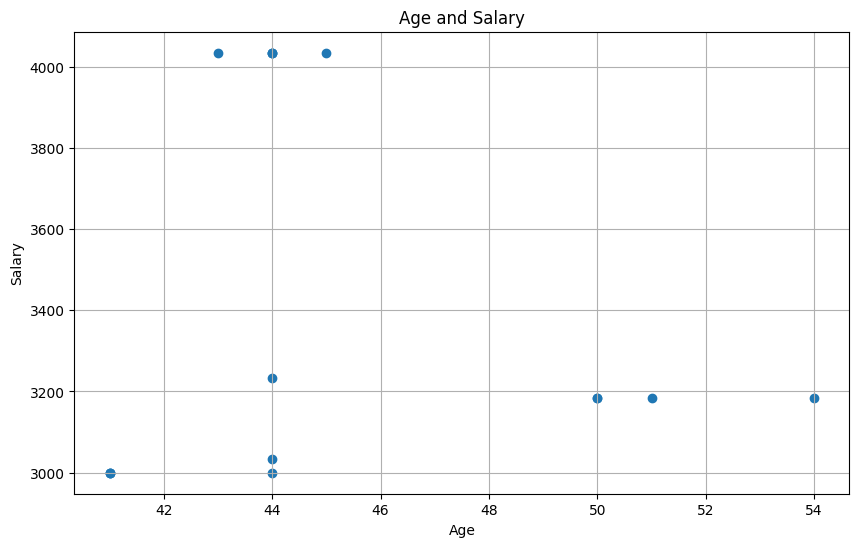

In [240]:
plt.figure(figsize = (10,6))
plt.scatter(employee_filter["Age"], employee_filter["Salary"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age and Salary")
plt.grid(True)
plt.show()

In [241]:
#Count the number of people from each place and represent it visually
no_of_people = employee['City'].value_counts()
no_of_people

City
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

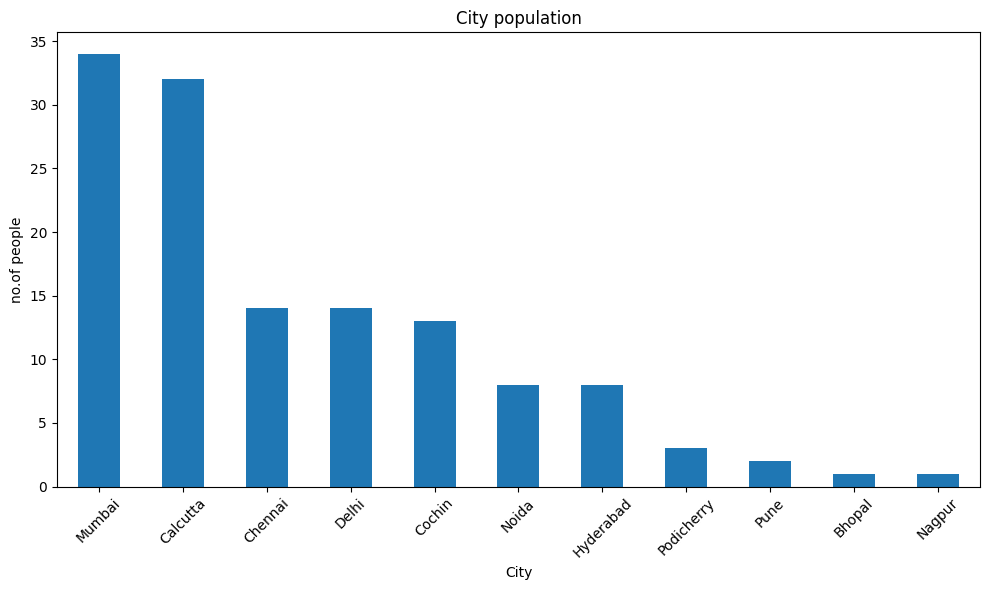

In [242]:
plt.figure(figsize=(10,6))
no_of_people.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("no.of people")
plt.title("City population")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [243]:
#Data Encoding
categorical_columns = ['Company',"City"]
employee_one_hot = employee
#one-hot encoding for catogorical column with multiple catogaries
for column in categorical_columns:
    if len(employee[column].unique())>2: #if not unique
        encoded_cols = pd.get_dummies(employee[column],prefix=column)
        employee_one_hot = pd.concat([employee, encoded_cols], axis = 1)
        employee_one_hot = employee_one_hot.drop(columns=[column])

employee_one_hot

,Company,Age,Salary,Country,Gender,City_Bhopal,City_Calcutta,City_Chennai,City_Cochin,City_Delhi,City_Hyderabad,City_Mumbai,City_Nagpur,City_Noida,City_Podicherry,City_Pune
0,TCS,20.0,5312.467742,India,0,False,False,True,False,False,False,False,False,False,False,False
1,Infosys,30.0,5312.467742,India,0,False,False,False,False,False,False,True,False,False,False,False
2,TCS,35.0,2300.000000,India,0,False,True,False,False,False,False,False,False,False,False,False
3,Infosys,40.0,3000.000000,India,0,False,False,False,False,True,False,False,False,False,False,False
4,TCS,23.0,4000.000000,India,0,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,India,0,False,False,False,False,False,False,True,False,False,False,False
143,TCS,33.0,9024.000000,India,1,False,True,False,False,False,False,False,False,False,False,False
145,Infosys,44.0,4034.000000,India,1,False,False,False,False,True,False,False,False,False,False,False
146,TCS,33.0,5034.000000,India,1,False,False,False,False,False,False,True,False,False,False,False


In [244]:
#label Encoding for binary catogircal columns
binary_catergorical_columns = ["Country", "Gender"]
employee_binary = employee.copy()
for column in binary_catergorical_columns:
    employee_binary[column] = LabelEncoder().fit_transform(employee_binary[column])

employee_binary

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5312.467742,Chennai,0,0
1,Infosys,30.0,5312.467742,Mumbai,0,0
2,TCS,35.0,2300.000000,Calcutta,0,0
3,Infosys,40.0,3000.000000,Delhi,0,0
4,TCS,23.0,4000.000000,Mumbai,0,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,0,0
143,TCS,33.0,9024.000000,Calcutta,0,1
145,Infosys,44.0,4034.000000,Delhi,0,1
146,TCS,33.0,5034.000000,Mumbai,0,1


In [245]:
#feature scaling using StandardScaler
numerical_columns = employee.select_dtypes(include=["number"]).columns
print(numerical_columns)

Index(['Age', 'Salary', 'Gender'], dtype='object')


In [246]:
#StandardScaler
employee_standardScaler = employee.copy()
employee_standardScaler[numerical_columns]=StandardScaler().fit_transform(employee_standardScaler[numerical_columns])
employee_standardScaler

,Company,Age,Salary,City,Country,Gender
0,TCS,-1.012082,0.010324,Chennai,India,-0.534522
1,Infosys,-0.050254,0.010324,Mumbai,India,-0.534522
2,TCS,0.430659,-1.266072,Calcutta,India,-0.534522
3,Infosys,0.911573,-0.969479,Delhi,India,-0.534522
4,TCS,-0.723534,-0.545775,Mumbai,India,-0.534522
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,-0.819716,1.234631,Mumbai,India,-0.534522
143,TCS,0.238294,1.582916,Calcutta,India,1.870829
145,Infosys,1.296304,-0.531369,Delhi,India,1.870829
146,TCS,0.238294,-0.107664,Mumbai,India,1.870829


In [249]:
#minMaxScaler
employee_minmax = employee.copy()
employee_minmax[numerical_columns] = MinMaxScaler().fit_transform(employee_minmax[numerical_columns])
employee_minmax

,Company,Age,Salary,City,Country,Gender
0,TCS,0.370370,0.480650,Chennai,India,0.0
1,Infosys,0.555556,0.480650,Mumbai,India,0.0
2,TCS,0.648148,0.137817,Calcutta,India,0.0
3,Infosys,0.740741,0.217480,Delhi,India,0.0
4,TCS,0.425926,0.331285,Mumbai,India,0.0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,0.407407,0.809491,Mumbai,India,0.0
143,TCS,0.611111,0.903039,Calcutta,India,1.0
145,Infosys,0.814815,0.335154,Delhi,India,1.0
146,TCS,0.611111,0.448959,Mumbai,India,1.0


In [250]:
employee

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1
